# Computational Modelling - Martijn, Sinem en Gijs
## Het data science proces
Voor dit casusopdracht doorlopen we de eerste 4 stappen in het proces.

- 1. Data collection, hiervoor hebben we al een dataset toegewezen  gekregen

- 2. Data processing, bewerken van de dataset, dit is grotendeels al gedaan

- 3. Data cleaning, opzoek naar dubbele en missende waarden

- 4. Data exploration & analysishoe kunnen we met deze data de vragen beantwoorden 

- 5. Model building, relaties tussen variabelen leggen

- 6. Visualization, verkenning van de data ondersteunen

- 7. Communication, data science pipeline netjes genoteerd inleveren 


## Onderzoeksvragen:
- Verhouding in kijkgedrag, wie gaat er naar de bioscoop, wie kijkt er online?
- Wanneer is een film populair genoeg voor een sequel?
- Leidt het casten van populaire acteur tot een meer bekeken film?

## Eerste verkenning:
Voor de eerste verkenning laden we met de python module pandas de file 'movie.csv' in zodat we goed bekijken wat daadwerkelijk in de database staat. We bekijken de dataset op verschillende manieren en hebben eronder "Notes" gemaakt zodat we een eerste indruk hebben van hoe de dataset er uitziet.

In [2]:
# import necessary libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
# load dataset
movies = pd.read_csv('movie.csv')

In [11]:
# read in and explore data
movies.describe(include='all')

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,...,5022.000000,5031,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,NaN,47,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


# Data analyses 

In [8]:
# list of features within dataset 
movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

De kolommen die we van plan zijn mee te nemen omdat ze relevant zijn voor de onderzoeksvragen die we hebben opgesteld:

- movie_title
- title_year
- imdb_score
- director_name
- gross
- duration
- actor_1_name 
- actor_2_name
- actor_3_name
- plot_keywords
- content_rating

In [9]:
# sample of the dataset 
movies.sample(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
4334,Color,Phil Morrison,41.0,107.0,17.0,322.0,Curtiss Cook,594.0,4556.0,Comedy|Drama,...,23.0,English,USA,R,NaN,2013.0,591.0,5.6,NaN,825
3389,Color,Will Gluck,262.0,92.0,87.0,424.0,Dan Byrd,15000.0,58401464.0,Comedy|Romance,...,264.0,English,USA,PG-13,8000000.0,2010.0,1000.0,7.1,1.85,19000
2446,Color,Adrian Lyne,38.0,112.0,213.0,45.0,Karen Young,567.0,6734844.0,Drama|Romance,...,118.0,English,USA,R,17000000.0,1986.0,67.0,5.9,1.85,0
980,Color,Steven Quale,228.0,89.0,77.0,159.0,Alycia Debnam-Carey,490.0,47553512.0,Action|Thriller,...,210.0,English,USA,PG-13,50000000.0,2014.0,298.0,5.8,1.85,15000
301,Black and White,Stefen Fangmeier,170.0,104.0,14.0,203.0,Ed Speleers,3000.0,75030163.0,Action|Adventure|Family|Fantasy,...,1690.0,English,USA,PG,100000000.0,2006.0,762.0,5.1,2.35,0


Observations: 

- Er zijn in totaal 5038(?) films (inclusief dubbele waarden)
- Met movies.duplicated(subset=None,keep='first').sum() zien we hoeveel dubbele waarden er zijn: 45
- 4939 director_names
- 5030 actor_2_name
- 5038 country 

In [6]:
movies.duplicated(subset=None,keep='first').sum()

45

We kunnen per kolom gaan bekijken hoeveel NULL waarden er per kolom in de dataset zijn d.m.v. pd.isnull().sum()

In [10]:
pd.isnull(movies).sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

Alle kolommen hebben NULL-waarden behalve: genres, movie_title, num_voted_users, cast_total_facebook_likes, movie_imdb_link, imdb_score.

Wat opvalt is dat gross de meeste NULL-waarden heeft. In totaal zijn er voor gross 4.159000e+03	records (4159) waarvan er 884 ontbreken. Dit is 21,26%. Aangezien we dit kolom wel willen meenemen is dit een belangrijk punt waar we rekening mee moeten houden bij verdere uitwerkingen

# Predictions

Aan de hand van de onderzoeksvragen kunnen we ook voorspellingen gaan doen die ons helpen bij het beantwoorden van deze vragen

Prediction: Hoe meer likes een bepaald acteur/actrice op facebook krijgt (dus hoe populairder de acteur/actrice is), hoe hoger de kans is dat de film waarin de acteur/actrice in speelt ook meer bekeken wordt.

Onderzoeksvraag: leidt het casten van populaire acteur tot meer bekeken film? / welke factoren dragen erbij toe dat een populaire acteur zorgt voor een vaak bekeken film / wat is de correlatie tussen acteur en film (???)

We nemen de onderstaande kolommen mee om te meten hoe 'populair' een acteur/actrice is door de facebook-likes te nemen
- actor_2_name
- actor_3_facebook_likes

In [26]:
q = movies['actor_3_facebook_likes'].head(10)

In [27]:
r = movies['actor_2_name'].head(10)

(array([    0.,  5000., 10000., 15000., 20000., 25000.]),
 <a list of 6 Text xticklabel objects>)

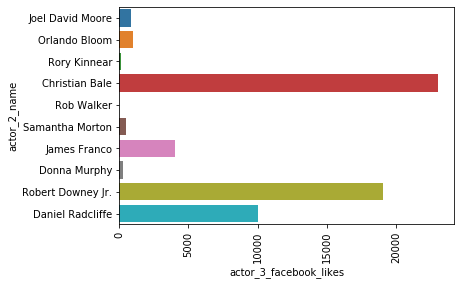

In [29]:
h = sns.barplot(x=q, y=r, data=movies)
plt.xticks(rotation=90)

We zien dus dat acteur Christian Bale de meeste facebook-likes heeft en daarmee voorspellen we ook dat hij in de beter bekeken film zit uit die lijst van 10.
Daarnaast missen we de likes van Rob Walker, maar het feit dat we nooit van deze man hebben gehoord zal ook genoeg zeggen over zijn facebook likes, het is dus niet waarschijnlijk dat hij Christian Bale inhaalt.

Om te kijken of de meest populaire acteurs ook in beter bekeken films zitten gaan we ook het volgende plotten:

In [20]:
# als voorbeeld nemen we alleen 10 records
# variabele x zijn de film 
x = movies['movie_title'].head(10)

In [21]:
# variabele y zijn de scores die elk film heeft gescoord op IMDB
y = movies['imdb_score'].head(10)

Als we variabele x en y gaan plotten met behulp van module seaborn kunnen we zien hoe elke film heeft gescoord en welke bijvoorbeeld uitsteekt. 

(array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.]),
 <a list of 10 Text xticklabel objects>)

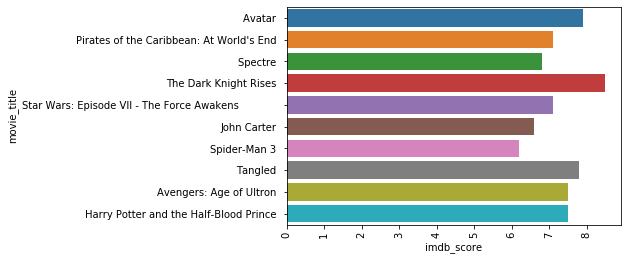

In [22]:
g = sns.barplot(x=y, y=x, data=movies)
plt.xticks(rotation=90)

Hogere imdb-score is niet altijd een meer bekeken film. Num_voted_users geeft weer hoeveel mensen er voor een film hebben gestemd. De mensen die hebben gestemd hebben hoogstwaarschijnlijk ook de film bekeken. Dit kolom kunnen we dus als maatstaf nemen. 
- Movies_title
- Num_voted_users


In [15]:
# de films
a = movies['movie_title'].head(10)

In [23]:
# aantal stemmen wat een film heeft gescoord
b = movies['num_voted_users'].head(10)

(array([      0.,  200000.,  400000.,  600000.,  800000., 1000000.,
        1200000., 1400000.]), <a list of 8 Text xticklabel objects>)

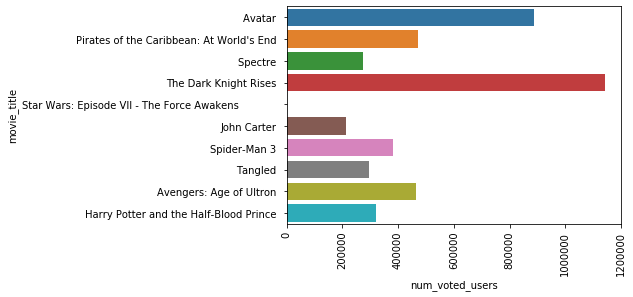

In [24]:
# bovenstaande data a en b gaan plotten in een grafiek
i = sns.barplot(x=b, y=a, data=movies)
plt.xticks(rotation=90)

De meest bekeken film is in de bovenste voorbeeld ‘The Dark Knight Rises’ en daarbij hoort acteur Christian Bale, die ook de meeste likes heeft. 
Echter is de film met de minste stemmen ‘John Carter’ waar actrice Samanta Morton bij hoort, die niet de minste likes heeft. 
